In [13]:
import pandas as pd
import altair as alt
from altair import datum
import numpy as np
from datetime import datetime as dt
from scipy.stats import ttest_ind
alt.data_transformers.disable_max_rows()

import baltic as bt
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import timedelta
import matplotlib.lines as mlines
import time
from io import StringIO
import altair as alt
import numpy as np
from zipfile import ZipFile



## exploring size of transmission clusters

In [14]:
new_clus =  "../mascot_glm/data/kc_clusters_combined_new.tsv"

In [15]:
clus_df = pd.read_csv(new_clus, sep="\t", parse_dates=  [3])

In [16]:
count_clusters = clus_df.groupby('new_clusters')["strain"].count().reset_index()
clus_df = clus_df.merge(count_clusters, on = "new_clusters")
clus_df = clus_df.rename(columns={"strain_x": "strain", "strain_y": "size_of_cluster"})

In [17]:
clus_df.head()

strain  cluster           location  \
0                  USA/WA-UW-21050529358/2021        1  North_King_County   
1                  USA/WA-UW-21050476716/2021        2  North_King_County   
2                USA/WA-UW-2021041397284/2021        3  North_King_County   
3                USA/WA-UW-2021041489375/2021        3  North_King_County   
4  USA/WA-Altius-ALTCOV-NBDJ5QXGCUU6C2F6/2021        3  South_King_County   

        date variant  is_unique  new_clusters  size_of_cluster  
0 2021-05-05   alpha       True             1                1  
1 2021-05-04   alpha       True             2                1  
2 2021-04-13   alpha       True             3                3  
3 2021-04-14   alpha      False             3                3  
4 2021-04-27   alpha      False             3                3

In [18]:
foo_clus_df = clus_df[clus_df.size_of_cluster >9 ]

In [19]:
def check_same(group):
    return all(group == group.iloc[0])

# Group by 'group' and apply the check_same function
result = foo_clus_df.groupby('new_clusters')['location'].apply(check_same)

print(result.value_counts())

False    86
True      4
Name: location, dtype: int64


In [20]:
result = result.reset_index()

In [21]:
list_of_mono = result[result.location == True].new_clusters.values.tolist(); list_of_mono


[829, 2376, 5575, 5939]

In [22]:
clus_df[clus_df.new_clusters.isin( list_of_mono)]

strain  cluster           location  \
2035                   USA/WA-UW-21050357897/2021      853  South_King_County   
2036                USA/WA-CDC-UW21050199176/2021      853  South_King_County   
2037                            USA/WA-S8458/2021      853  South_King_County   
2038                            USA/WA-S8615/2021      853  South_King_County   
2039                            USA/WA-S8602/2021      853  South_King_County   
2040                            USA/WA-S8634/2021      853  South_King_County   
2041                USA/WA-CDC-UW21051867519/2021      853  South_King_County   
2042                USA/WA-CDC-UW21052535797/2021      853  South_King_County   
2043   USA/WA-Altius-ALTCOV-SQPCMM4FGCFPN3UV/2021      853  South_King_County   
2044                            USA/WA-S8617/2021      853  South_King_County   
2045                            USA/WA-S8612/2021      853  South_King_County   
2046                USA/WA-CDC-UW21051746308/2021      853  South_King_County   
2047                USA/WA-CDC-UW21052440222/2021      853  South_King_County   
2048                            USA/WA-S8610/2021      853  South_King_County   
2049                USA/WA-CDC-UW21052413641/2021      853  South_King_County   
2050                   USA/WA-UW-21050183130/2021      853  South_King_County   
2051                   USA/WA-UW-21042019524/2021      853  South_King_County   
2052                   USA/WA-UW-21042132667/2021      853  South_King_County   
2053   USA/WA-Altius-ALTCOV-HYNXDIJUVQ2FDTRN/2021      853  South_King_County   
2054   USA/WA-Altius-ALTCOV-W3IVDKEX4PA3U2WT/2021      853  South_King_County   
2055   USA/WA-Altius-ALTCOV-IIFA5NM2VECN4RUH/2021      853  South_King_County   
2056                   USA/WA-UW-21042960078/2021      853  South_King_County   
2057   USA/WA-Altius-ALTCOV-XLTVLYE5ZASJTFTS/2021      853  South_King_County   
5049                USA/WA-CDC-UW21071055600/2021     1260  North_King_County   
5050                   USA/WA-UW-21090837962/2021     1260  North_King_County   
5051                   USA/WA-UW-21072712681/2021     1260  North_King_County   
5052                   USA/WA-UW-21090883425/2021     1260  North_King_County   
5053                USA/WA-CDC-UW21112222582/2021     1260  North_King_County   
5054                USA/WA-CDC-UW21110390106/2021     1260  North_King_County   
5055                USA/WA-CDC-UW21092519911/2021     1260  North_King_County   
5056                USA/WA-CDC-UW21112628520/2021     1260  North_King_County   
5057                USA/WA-CDC-UW21120273252/2021     1260  North_King_County   
5058                   USA/WA-UW-21090679343/2021     1260  North_King_County   
5059                   USA/WA-UW-21072324498/2021     1260  North_King_County   
5060                USA/WA-CDC-UW21113019069/2021     1260  North_King_County   
5061                   USA/WA-UW-21070285528/2021     1260  North_King_County   
10547                        USA/WA-UW-22978/2020     1026  South_King_County   
10548                        USA/WA-UW-23365/2020     1026  South_King_County   
10549                        USA/WA-UW-23390/2020     1026  South_King_County   
10550                        USA/WA-UW-22892/2020     1026  South_King_County   
10551                        USA/WA-UW-21742/2020     1026  South_King_County   
10552                        USA/WA-UW-22077/2020     1026  South_King_County   
10553                        USA/WA-UW-23481/2020     1026  South_King_County   
10554                           USA/WA-S2852/2020     1026  South_King_County   
10555                        USA/WA-UW-23464/2020     1026  South_King_County   
10556                           USA/WA-S2798/2020     1026  South_King_County   
10557                           USA/WA-S2799/2020     1026  South_King_County   
11325  USA/WA-Altius-ALTCOV-7P2RZZ4FLOJD2VDT/2021     1399  South_King_County   
11326  USA/WA-Altius-ALTCOV-7W4ELMUZKFXU3RBB/2021     1399  South_King_Cou

In [23]:
#first we explore cluster size by variant
variants = list(clus_df.variant.unique())
final_cluster_df = pd.DataFrame()
for name in variants: 
    cluster_counts = pd.DataFrame()
    cluster_counts['count_clus'] = clus_df[clus_df['variant'] ==name].new_clusters.value_counts()
    cluster_counts = cluster_counts.reset_index()
    cluster_counts = cluster_counts.rename(columns={"index": "clusid", "count_clus": "size", "variant": "Variant"})
    cluster_counts["Variant"] = name

    final_cluster_df = pd.concat([ final_cluster_df, cluster_counts], ignore_index=True)

In [24]:
final_cluster_df.head()


clusid  size Variant
0     795   405   alpha
1     222    82   alpha
2    1019    42   alpha
3    1056    39   alpha
4     937    33   alpha

In [25]:
#final_cluster_df = final_cluster_df[final_cluster_df["size"] <405]

In [26]:
final_cluster_df = final_cluster_df[["size", "Variant"]]
df_size = pd.DataFrame(final_cluster_df.groupby('Variant', as_index = False).value_counts())#.reset_index()
df_size['perc'] = df_size.groupby('Variant')['count'].apply(lambda x: x/x.sum())


df_size.head()

Variant  size  count      perc
0   alpha     1    776  0.684907
1   alpha     2    147  0.129744
2   alpha     3     78  0.068844
3   alpha     4     34  0.030009
4   alpha     7     21  0.018535

In [27]:
log_clusters =  alt.Chart(df_size).mark_line(opacity = 1, interpolate = "monotone").encode(
    x=alt.X('size:Q', axis=alt.Axis(title="Cluster Size", grid=False)),
    y=alt.Y('perc:Q',  axis=alt.Axis(title="Log Frequency Distribution",labelFontSize= 14, titleFontSize = 12, grid=False, format='%'), scale=alt.Scale(type = "log", zero = True)),
    color = alt.Color("Variant:N", legend=alt.Legend(offset = -140,  labelFontSize = 14, titleFontSize = 12))).transform_filter(datum.size < 11).properties(
    width=300,
    height=200
)
log_clusters

alt.Chart(...)

In [28]:
#now we explore cluster size by region
cluster_counts_n = pd.DataFrame()
cluster_counts_s = pd.DataFrame()
cluster_counts_n['count_clus'] = clus_df[clus_df['location'] =="North_King_County"].new_clusters.value_counts()
cluster_counts_s['count_clus'] = clus_df[clus_df['location'] =="South_King_County"].new_clusters.value_counts()


In [29]:
cluster_counts_n = cluster_counts_n.reset_index()
cluster_counts_n = cluster_counts_n.rename(columns={"index": "clusid", "count_clus": "size", "location": "Region"})
cluster_counts_s = cluster_counts_s.reset_index()
cluster_counts_s = cluster_counts_s.rename(columns={"index": "clusid", "count_clus": "size", "location": "Region"})

cluster_counts_n["Region"] = "North King County"
cluster_counts_s["Region"] = "South King County"

In [30]:
concat_clus = pd.concat([ cluster_counts_n, cluster_counts_s], ignore_index=True)
#concat_clus
concat_clus = concat_clus[["size", "Region"]]
#test.to_csv("cluster_distribution.tsv",  sep="\t")

In [31]:
concat_clus.head()

size             Region
0   149  North King County
1   122  North King County
2    58  North King County
3    48  North King County
4    46  North King County

In [32]:
df_size = pd.DataFrame(concat_clus.groupby('Region', as_index = False).value_counts())#.reset_index()
df_size['perc'] = df_size.groupby('Region')['count'].apply(lambda x: x/x.sum())


df_size.head()


Region  size  count      perc
0  North King County     1   2999  0.788795
1  North King County     2    437  0.114940
2  North King County     3    172  0.045239
3  North King County     4     57  0.014992
4  North King County     5     43  0.011310

In [33]:
log_clusters =  alt.Chart(df_size).mark_line(opacity = 1, interpolate = "monotone").encode(
    x=alt.X('size:Q', axis=alt.Axis(title="Cluster Size", grid=False)),
    y=alt.Y('perc:Q',  axis=alt.Axis(title="Log Frequency Distribution",labelFontSize= 14, titleFontSize = 12, grid=False, format='%'), scale=alt.Scale(type = "log", zero = True)),
    color = alt.Color("Region:N", legend=alt.Legend(offset = -140,  labelFontSize = 14, titleFontSize = 12))).transform_filter(datum.size < 11).properties(
    width=300,
    height=200
)
log_clusters

alt.Chart(...)

In [34]:
linear_clusters =  alt.Chart(df_size).mark_line(opacity = 1, interpolate = "monotone").encode(
    x=alt.X('size:Q', axis=alt.Axis(title="Cluster Size", grid=False)),
    y=alt.Y('perc:Q',  axis=alt.Axis(title="Frequency Distribution",labelFontSize= 14, titleFontSize = 12, grid=False, format='%')),
    color = alt.Color("Region:N")).transform_filter(datum.size < 11).properties(
    width=300,
    height=200
)
linear_clusters

alt.Chart(...)

In [35]:
cluster_count = linear_clusters | log_clusters
cluster_count

alt.HConcatChart(...)

In [36]:
#calculate mean cluster size
df_size["contribution"] = df_size["size"] * df_size['perc']
df_size.groupby('Region')["contribution"].sum()

Region
North King County    1.613361
South King County    1.865884
Name: contribution, dtype: float64

In [37]:
#two sample t test for cluster size 
#define samples
group1 = concat_clus[concat_clus['Region']=='North King County']
group2 = concat_clus[concat_clus['Region']=='South King County']

#perform independent two sample t-test
ttest_ind(group1['size'], group2['size'])


Ttest_indResult(statistic=-1.9757115085592991, pvalue=0.048228979458211675)

# now look at number of clusters over time for each region

In [38]:
date_clus = clus_df.groupby('new_clusters').first().reset_index()

In [39]:
date_clus

new_clusters                                      strain  cluster  \
0                1                  USA/WA-UW-21050529358/2021        1   
1                2                  USA/WA-UW-21050476716/2021        2   
2                3                USA/WA-UW-2021041397284/2021        3   
3                4                        USA/WA-UW-65398/2021        4   
4                5                        USA/WA-UW-69277/2021        5   
...            ...                                         ...      ...   
5959          5960  USA/WA-Altius-ALTCOV-BEQRS2ML7ZX3EQWJ/2021     1421   
5960          5961                           USA/WA-S2728/2020     1422   
5961          5962               USA/WA-CDC-UW22030161746/2022     1423   
5962          5963               USA/WA-CDC-UW22030214877/2022     1424   
5963          5964               USA/WA-CDC-UW22022865732/2022     1425   

               location       date variant  is_unique  size_of_cluster  
0     North_King_County 2021-05-05   alpha       True                1  
1     North_King_County 2021-05-04   alpha       True                1  
2     North_King_County 2021-04-13   alpha       True                3  
3     North_King_County 2021-02-27   alpha       True                1  
4     South_King_County 2021-03-26   alpha       True                1  
...                 ...        ...     ...        ...              ...  
5959  South_King_County 2021-07-09   other       True                3  
5960  North_King_County 2020-07-08   other       True                2  
5961  North_King_County 2022-03-01   other       True                1  
5962  North_King_County 2022-03-02   other       True                2  
5963  North_King_County 2022-02-28   other       True                2  

[5964 rows x 8 columns]

In [40]:
def convert_format(number):
    #date = dt.strptime(number, '%Y-%m-%d')
    date = dt.strftime(number, '%Y-%m')
    return date

In [41]:
date_clus['year-month'] = date_clus['date'].map(convert_format)

In [42]:
date_clus

new_clusters                                      strain  cluster  \
0                1                  USA/WA-UW-21050529358/2021        1   
1                2                  USA/WA-UW-21050476716/2021        2   
2                3                USA/WA-UW-2021041397284/2021        3   
3                4                        USA/WA-UW-65398/2021        4   
4                5                        USA/WA-UW-69277/2021        5   
...            ...                                         ...      ...   
5959          5960  USA/WA-Altius-ALTCOV-BEQRS2ML7ZX3EQWJ/2021     1421   
5960          5961                           USA/WA-S2728/2020     1422   
5961          5962               USA/WA-CDC-UW22030161746/2022     1423   
5962          5963               USA/WA-CDC-UW22030214877/2022     1424   
5963          5964               USA/WA-CDC-UW22022865732/2022     1425   

               location       date variant  is_unique  size_of_cluster  \
0     North_King_County 2021-05-05   alpha       True                1   
1     North_King_County 2021-05-04   alpha       True                1   
2     North_King_County 2021-04-13   alpha       True                3   
3     North_King_County 2021-02-27   alpha       True                1   
4     South_King_County 2021-03-26   alpha       True                1   
...                 ...        ...     ...        ...              ...   
5959  South_King_County 2021-07-09   other       True                3   
5960  North_King_County 2020-07-08   other       True                2   
5961  North_King_County 2022-03-01   other       True                1   
5962  North_King_County 2022-03-02   other       True                2   
5963  North_King_County 2022-02-28   other       True                2   

     year-month  
0       2021-05  
1       2021-05  
2       2021-04  
3       2021-02  
4       2021-03  
...         ...  
5959    2021-07  
5960    2020-07  
5961    2022-03  
5962    2022-03  
5963    2022-02  

[5964 rows x 9 columns]

In [43]:
variant_date_df = date_clus.groupby(["year-month","location", "variant"])["size_of_cluster"].mean().reset_index(); variant_date_df

year-month           location  variant  size_of_cluster
0     2020-02  North_King_County    other         1.250000
1     2020-03  North_King_County    other         1.804598
2     2020-03  South_King_County    other         1.520833
3     2020-04  North_King_County    other         3.448980
4     2020-04  South_King_County    other         1.642857
..        ...                ...      ...              ...
83    2022-02  North_King_County    other         2.000000
84    2022-02  South_King_County  omicron         1.698630
85    2022-03  North_King_County  omicron         1.590361
86    2022-03  North_King_County    other         1.500000
87    2022-03  South_King_County  omicron         1.564103

[88 rows x 4 columns]

In [44]:
date_clus.location[date_clus.location == "North_King_County"] = "North King County"
date_clus.location[date_clus.location == "South_King_County"] = "South King County"

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_57086/1765852014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_clus.location[date_clus.location == "North_King_County"] = "North King County"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_57086/1765852014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_clus.location[date_clus.location == "South_King_County"] = "South King County"


In [45]:
clust_over_time_kc =  alt.Chart(date_clus).mark_bar(opacity = 1, interpolate='monotone', size = 10).encode(
    alt.X('year-month:T', axis = alt.Axis(grid= False, format = "%B %Y", title = "")),
    alt.Y('count():Q', axis=alt.Axis(title="Number of Local Outbreak Clusters", grid=False, labelFontSize = 14), stack = None), 
    alt.Color("location:N", legend = None), 
    column= alt.Column("location:N", title = None, spacing = 70, header=alt.Header(labelFontSize = 14))
).properties(
    width=300,
    height=200
)
clust_over_time_kc

alt.Chart(...)

In [46]:
clust_over_time =  alt.Chart(date_clus).mark_bar(opacity = 1, interpolate='monotone', size = 10).encode(
    alt.X('year-month:T', axis = alt.Axis(grid= False, format = "%B %Y", title = "")),
    alt.Y('count():Q', axis=alt.Axis(title="Number of Local Outbreak Clusters", grid=False, labelFontSize = 14), stack = None), 
    alt.Color("variant:N"), 
    column= alt.Column("location:N", title = None, spacing = 70, header=alt.Header(labelFontSize = 14))
).properties(
    width=300,
    height=200
)

In [47]:
clust_over_time

alt.Chart(...)

In [48]:
clust_over_time =  alt.Chart(variant_date_df).mark_line(opacity = 1, interpolate='monotone',).encode(
    alt.X('year-month:O', axis = alt.Axis(grid= False,  title = "")),
    alt.Y('size_of_cluster:Q', axis=alt.Axis(title="Mean Size of Local Outbreak Clusters", grid=False, labelFontSize = 14,), stack = None), 
    alt.Color("variant:N"), 
    row= alt.Row("location:N", title = None, spacing = 15, header=alt.Header(labelFontSize = 14))
).transform_filter(datum.size_of_cluster <10)
clust_over_time

alt.Chart(...)

In [49]:
clust_over_time =  alt.Chart(variant_date_df).mark_line(opacity = 1, interpolate='monotone',).encode(
    alt.X('year-month:T', axis = alt.Axis(grid= False, format = "%B %Y", title = "")),
    alt.Y('size_of_cluster:Q', axis=alt.Axis(title="Mean Size of Local Outbreak Clusters", grid=False, labelFontSize = 14,), stack = None), 
    alt.Color("variant:N"), 
    column= alt.Column("location:N", title = None, spacing = 70, header=alt.Header(labelFontSize = 14))
).transform_filter(datum.size_of_cluster <10)


clust_over_time

alt.Chart(...)

In [50]:
date_clus

new_clusters                                      strain  cluster  \
0                1                  USA/WA-UW-21050529358/2021        1   
1                2                  USA/WA-UW-21050476716/2021        2   
2                3                USA/WA-UW-2021041397284/2021        3   
3                4                        USA/WA-UW-65398/2021        4   
4                5                        USA/WA-UW-69277/2021        5   
...            ...                                         ...      ...   
5959          5960  USA/WA-Altius-ALTCOV-BEQRS2ML7ZX3EQWJ/2021     1421   
5960          5961                           USA/WA-S2728/2020     1422   
5961          5962               USA/WA-CDC-UW22030161746/2022     1423   
5962          5963               USA/WA-CDC-UW22030214877/2022     1424   
5963          5964               USA/WA-CDC-UW22022865732/2022     1425   

               location       date variant  is_unique  size_of_cluster  \
0     North King County 2021-05-05   alpha       True                1   
1     North King County 2021-05-04   alpha       True                1   
2     North King County 2021-04-13   alpha       True                3   
3     North King County 2021-02-27   alpha       True                1   
4     South King County 2021-03-26   alpha       True                1   
...                 ...        ...     ...        ...              ...   
5959  South King County 2021-07-09   other       True                3   
5960  North King County 2020-07-08   other       True                2   
5961  North King County 2022-03-01   other       True                1   
5962  North King County 2022-03-02   other       True                2   
5963  North King County 2022-02-28   other       True                2   

     year-month  
0       2021-05  
1       2021-05  
2       2021-04  
3       2021-02  
4       2021-03  
...         ...  
5959    2021-07  
5960    2020-07  
5961    2022-03  
5962    2022-03  
5963    2022-02  

[5964 rows x 9 columns]

In [51]:
#adding labels
clust_over_time_kc = clust_over_time_kc.properties(title = "A")
cluster_count = cluster_count.properties(title = "B")

clus_des = (clust_over_time_kc & cluster_count).resolve_scale(color = "independent")
clus_des.configure_view(
    strokeWidth=0
).configure_title(
    anchor='start', fontSize= 30
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_legend(
    labelFontSize = 14)

alt.VConcatChart(...)

In [52]:
#clus_des.save("../figures/clust_over_time.html")

In [53]:
### working on MCC tree for part 2C

In [54]:
tree12=bt.loadNexus('../analysis/data-files/mcc_tree_random_3000.trees', absoluteTime = False)
tree12.setAbsoluteTime(2022.1753424657534)

In [55]:
clist=[(0.0,'#3B76AF'),
       (0.5,'grey'),
       (1.0,'#E68033')]

host_cmap = mpl.colors.LinearSegmentedColormap.from_list('mycmap',clist)

In [56]:
def convertDate(x,start,end):
    """ Converts calendar dates between given formats """
    return dt.strftime(dt.strptime(x,start),end)

In [57]:
for k in tree12.Objects:
    if "typeTrait.set" not in k.traits:
        k.traits.update({'typeTrait.set': []})
    if "typeTrait" not in k.traits:
        k.traits.update({'typeTrait': []})
    if k.traits['typeTrait'] == []:
        k.traits.update({'typeTrait': 'none'})

In [58]:
division_order = ['North_King_County', 'South_King_County']
exclusions = ['none', 'root', 'ancestor']

In [59]:
##this can be used to find root locations and make predefined clusters into individual subtrees.
def enumerate_subtrees_clusters(tree):
    
    traitName="typeTrait"

    tree.root.traits[traitName]='ancestor' ## give root node some trait value that's different from what the actual tree root has, so it registers as a switch

    tree_strings={division:[] for division in division_order}
    subtype_trees=[]

    for k in sorted(tree.Objects,key=lambda x:x.height):
        kp=k.parent     # kp is the parent node of k
        
        ## get current node's (k) and its parent's (kp) trait states
        kloc=k.traits[traitName]      # kloc = trait of k; kc = trait of k; they are the same thing
        if traitName in k.parent.traits:       # if parent has a trait block, use that trait, else assign to ancestor
            kploc=kp.traits[traitName]              # kploc = trait of parental node
        else:
            kploc='ancestor'

        kc=kloc     
        ## if states do not match
        if (kloc != kploc) & (kploc in exclusions):      # if node and parental node do not have the same trait
            #N_children=len(k.leaves)
            traverse_condition=lambda w:w.traits[traitName] in division_order     # traverse tree for all nodes whose traitname = kc
            #print('subtree resulting from %s>%s switch, traversing within %s'%(kploc,kloc,kloc))
            subtree=tree.subtree(k,traverse_condition=traverse_condition) #traitName = traitName ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the starting trait value state

            if subtree != None:
                subtree.traverse_tree()
                subtree.sortBranches()

                #tree_strings[kloc].append(subtree.toString()) ## remember subtree string, subtree object itself
                subtype_trees.append((kploc, kloc, subtree))
    
    return(subtype_trees)

In [60]:
subtype_trees = enumerate_subtrees_clusters(tree12)


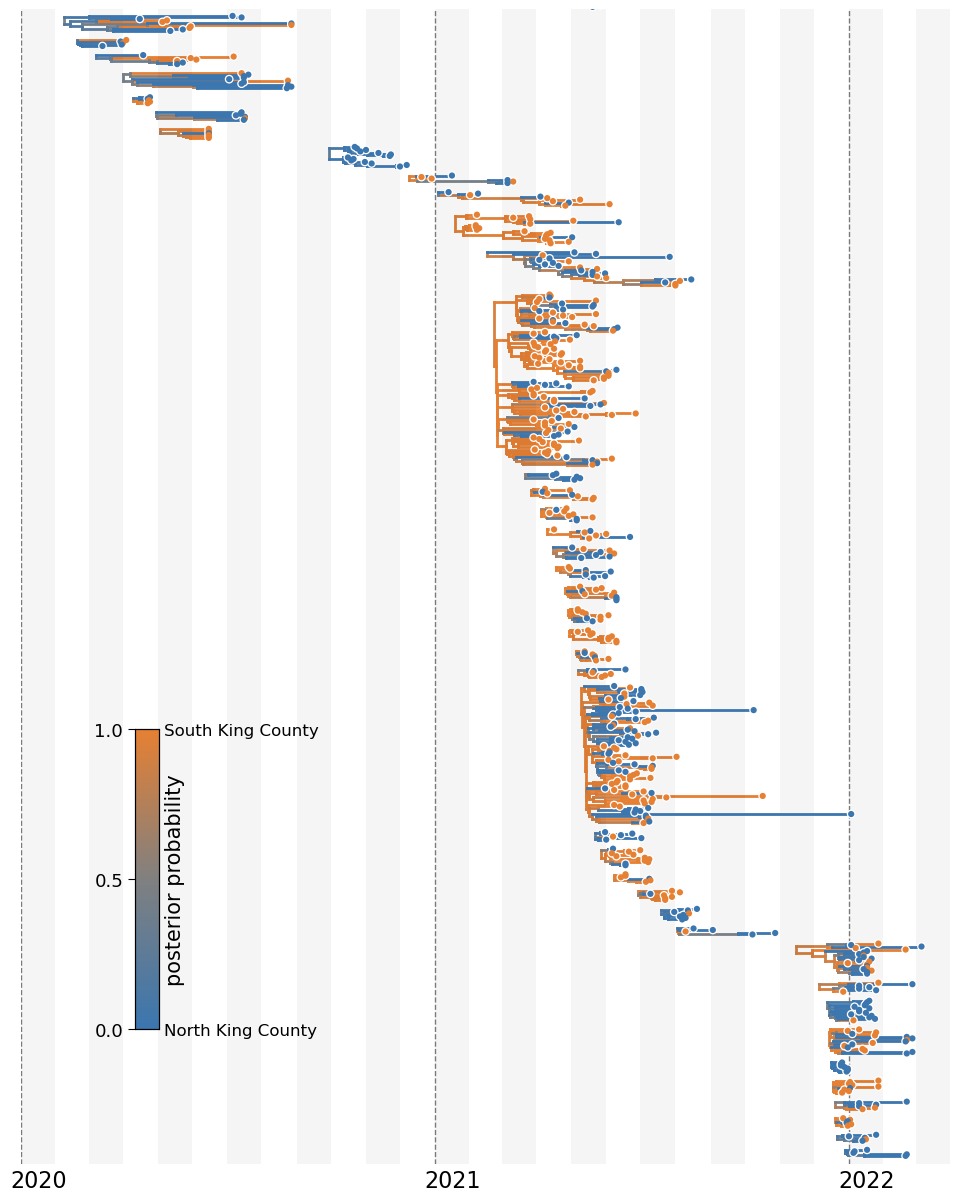

In [61]:
fig,ax = plt.subplots(figsize=(12,15),facecolor='w')
cumulativeY=0
branchWidth=2
for t,tr in enumerate(sorted(subtype_trees,key=lambda x:(-x[2].root.absoluteTime))): ## iterate over extracted subtrees sorted according to their root height and their size
    origin,root,loc_tree=tr

    for k in loc_tree.Objects:
        c='k'
        if 'South_King_County' in k.traits['typeTrait.set']:
            hidx=k.traits['typeTrait.set'].index('South_King_County')
            c=host_cmap(k.traits['typeTrait.set.prob'][hidx])
        else:
            c=host_cmap(0.0)

        z=1
        if k.traits['typeTrait']=='North_King_County':
            z=2

        x=k.absoluteTime
        y=k.y+cumulativeY

        xp=k.parent.absoluteTime
        if xp==0:
            xp=x

        if k.branchType=='leaf':
            ax.scatter(x,y,s=20,facecolor=c,edgecolor='none',zorder=4)
            ax.scatter(x,y,s=40,facecolor='w',edgecolor='none',zorder=3)
        else:
            yl=k.children[0].y+cumulativeY
            yr=k.children[-1].y+cumulativeY
            ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=z)

        if loc_tree.Objects.index(k)!=0:
            ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=z)
    cumulativeY+=loc_tree.ySpan+5

every=12
xDates=['%04d-%02d-01'%(y,m) for y in range(2019,2023) for m in range(1,13)]

[ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)]
ax.set_xticks([bt.decimalDate(x)+1/24.0 for x in xDates if (int(x.split('-')[1])-1)%every==0])

ax.set_xticklabels([convertDate(x,'%Y-%m-%d','%Y') if x.split('-')[1]=='01' else convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0])
ax.tick_params(axis='x',labelsize=16,size=0)

[ax.axvline(i,ls='--',lw=1,color='grey',zorder=0) for i in range(2019,2023)]

        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(size=0)
#ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlim(bt.decimalDate('2020-01-01'),bt.decimalDate('2022-04-01'))
ax.set_ylim(-5,cumulativeY -15)

ax2 = fig.add_axes([0.22, 0.2, 0.02, 0.2])
mpl.colorbar.ColorbarBase(ax2, cmap=host_cmap,ticks=np.linspace(0.0,1.0,3))
ax2.tick_params(size=5,labelsize=13)
ax2.set_ylabel('posterior probability', size=15)
ax3=ax2.twinx()
ax3.set_ylim(0,1)
ax3.set_yticks([0.0,1.0])
ax3.set_yticklabels(['North King County','South King County'])
ax3.tick_params(size=0,labelsize=12)
plt.savefig('../figures/mcc_clusters_size_5.png',dpi=300,bbox_inches='tight')
plt.show()